# Ayodhya Data Analysis

In [88]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from wordcloud import WordCloud
import re
from datetime import datetime
import plotly.graph_objects as go
import plotly.express as px

In [89]:
# Create DataFrames from the SQL tables
deity_df = pd.DataFrame({
    'DeityID': [1, 2],
    'Name': ['Rama', 'Ram Lalla Virajman'],
    'Description': ['An incarnation of Vishnu, a principal deity of Hinduism born in Ayodhya.',
                    'The infant form of Rama, the presiding deity of the Ram Mandir temple.']
})

temple_df = pd.DataFrame({
    'TempleID': [1],
    'Name': ['Ram Mandir'],
    'Location': ['Ayodhya, Uttar Pradesh, India'],
    'ConstructionStartDate': ['2020-03-01'],
    'ExpectedCompletionDate': ['2024-01-22']
})

construction_phase_df = pd.DataFrame({
    'PhaseID': [1, 2, 3, 4],
    'TempleID': [1, 1, 1, 1],
    'PhaseName': ['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4'],
    'StartDate': ['2020-03-01', '2020-06-01', '2021-01-10', '2021-06-15'],
    'CompletionDate': ['2020-05-15', '2020-08-30', '2021-03-25', '2022-02-28']
})

architecture_df = pd.DataFrame({
    'ArchitectureID': [1, 2, 3],
    'TempleID': [1, 1, 1],
    'ArchitectName': ['Chandrakant Sompura', 'Nikhil Sompura', 'Ashish Sompura'],
    'Description': ['Chief architect of the temple', 'Assistant architect', 'Assistant architect']
})

donations_df = pd.DataFrame({
    'DonationID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'DonorName': ['Ram Nath Kovind', 'Anonymous Donor', 'Leadership Council', 'H.D. Kumaraswamy', 'Siddaramaiah',
                  'VHP Activist 1', 'VHP Activist 2', 'Muslim Community Member', 'Christian Community Member', 'Anonymous Supporter'],
    'Amount': [501000.00, 100.00, 1000000.00, 5000.00, 20000.00, 50.00, 75.00, 1000.00, 500.00, 200.00],
    'DonationDate': ['2021-01-15', '2021-02-01', '2021-03-10', '2021-05-01', '2021-05-15', '2021-06-01', '2021-06-15',
                     '2021-07-01', '2021-07-15', '2021-08-01'],
    'TempleID': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
})

events_df = pd.DataFrame({
    'EventID': [1, 2, 3, 4],
    'EventName': ['Commencement Ceremony', 'Bhoomi Pujan Ceremony', 'Vijay Mahamantra Jaap Anushthan', 'Pran Pratishtha Ceremony'],
    'EventDate': ['2020-08-05', '2020-08-05', '2020-04-06', '2024-01-22'],
    'Description': ['Ceremony celebrating the commencement of Ram Mandir construction by PM Narendra Modi',
                    'Ground-breaking ceremony with Vedic rituals and foundation stone laying by PM Narendra Modi',
                    'Chanting of Vijay Mahamantra for victory over hurdles in temple construction',
                    'Consecration ceremony scheduled for the installation of Lord Ram idol in the garbhagriha']
})

temple_events_df = pd.DataFrame({
    'TempleID': [1, 1, 2, 2],
    'EventID': [1, 2, 3, 4]
})

# Displaying sample data from each DataFrame
print("Deity DataFrame:")
print(deity_df)

print("\nTemple DataFrame:")
print(temple_df)

print("\nConstruction Phase DataFrame:")
print(construction_phase_df)

print("\nArchitecture DataFrame:")
print(architecture_df)

print("\nDonations DataFrame:")
print(donations_df)

print("\nEvents DataFrame:")
print(events_df)

print("\nTemple Events DataFrame:")
print(temple_events_df)

Deity DataFrame:
   DeityID                Name  \
0        1                Rama   
1        2  Ram Lalla Virajman   

                                         Description  
0  An incarnation of Vishnu, a principal deity of...  
1  The infant form of Rama, the presiding deity o...  

Temple DataFrame:
   TempleID        Name                       Location ConstructionStartDate  \
0         1  Ram Mandir  Ayodhya, Uttar Pradesh, India            2020-03-01   

  ExpectedCompletionDate  
0             2024-01-22  

Construction Phase DataFrame:
   PhaseID  TempleID PhaseName   StartDate CompletionDate
0        1         1   Phase 1  2020-03-01     2020-05-15
1        2         1   Phase 2  2020-06-01     2020-08-30
2        3         1   Phase 3  2021-01-10     2021-03-25
3        4         1   Phase 4  2021-06-15     2022-02-28

Architecture DataFrame:
   ArchitectureID  TempleID        ArchitectName  \
0               1         1  Chandrakant Sompura   
1               2         1    

## Deity and Temple Information Analysis

In [90]:
# Who are the deities associated with the temples, and what are their descriptions?
# Merge dataframes to associate deities with temples
merged_df = pd.merge(temple_df, deity_df, left_on='TempleID', right_on='DeityID', how='inner')

# Display deities and their descriptions associated with the temples
result_df = merged_df.rename(columns={'Name_x': 'Temple', 'Name_y': 'Deity', 'Description_x': 'Description'})
print(result_df[['Temple', 'Deity', 'Description']])

       Temple Deity                                        Description
0  Ram Mandir  Rama  An incarnation of Vishnu, a principal deity of...


There is only one temple with whom a deity is associated. Deity is **Ram** and temple is **Ram Mandir**. Ram is an incarnation of Vishnu, a principal deity of Hinduism born in Ayodhya.

In [91]:
# Provide a list of temples along with the deity names.
# Merge dataframes to associate deities with temples
merged_df = pd.merge(temple_df, deity_df, left_on='TempleID', right_on='DeityID', how='inner')

# Display list of temples along with deity names
temple_deity_list = merged_df[['Name_x', 'Name_y']].rename(columns={'Name_x': 'Temple', 'Name_y': 'Deity'})
print(temple_deity_list)

       Temple Deity
0  Ram Mandir  Rama


Temple is **Ram Mandir** and its deity is **Ram**.

In [92]:
# How many temples are there in the dataset, and where are they located?
# Displaying Temple DataFrame
print("\nTemple DataFrame:")
print(temple_df)


Temple DataFrame:
   TempleID        Name                       Location ConstructionStartDate  \
0         1  Ram Mandir  Ayodhya, Uttar Pradesh, India            2020-03-01   

  ExpectedCompletionDate  
0             2024-01-22  


There is only one temple in the dataset. The temple name is Ram Mandir. **Ram Mandir is located in a city known as Ayodhya.** Ayodhya is in a state known as Uttar Pradesh which is a part of India.


Construction Status for TempleID 1:
  PhaseName   StartDate CompletionDate     Status
0   Phase 1  2020-03-01     2020-05-15  Completed
1   Phase 2  2020-06-01     2020-08-30  Completed
2   Phase 3  2021-01-10     2021-03-25  Completed
3   Phase 4  2021-06-15     2022-02-28  Completed


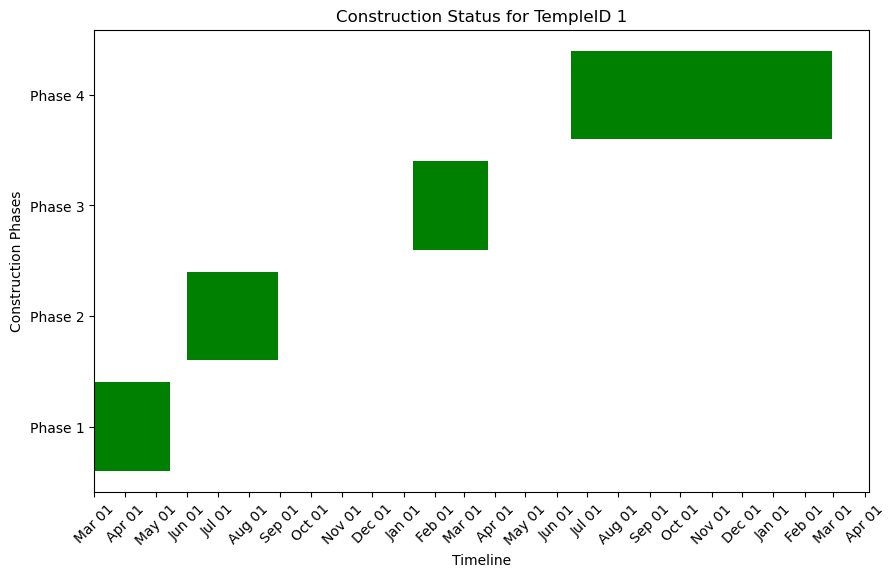

In [93]:
# What is the status of the construction for each temple?
# Assuming the current date is 2024-01-08
current_date = pd.to_datetime('2024-01-08')

# Filter construction phases for the specific temple (TempleID 1)
temple_construction_phases = construction_phase_df[construction_phase_df['TempleID'] == 1]

# Check the status of each phase
temple_construction_phases['Status'] = temple_construction_phases.apply(
    lambda row: 'In Progress' if current_date >= pd.to_datetime(row['StartDate']) and current_date <= pd.to_datetime(row['CompletionDate']) else 'Completed' if current_date > pd.to_datetime(row['CompletionDate']) else 'Not Started',
    axis=1
)

# Display the status for each construction phase
print("\nConstruction Status for TempleID 1:")
print(temple_construction_phases[['PhaseName', 'StartDate', 'CompletionDate', 'Status']])

# Convert dates to datetime format for plotting
temple_construction_phases['StartDate'] = pd.to_datetime(temple_construction_phases['StartDate'])
temple_construction_phases['CompletionDate'] = pd.to_datetime(temple_construction_phases['CompletionDate'])

# Create a Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(temple_construction_phases['PhaseName'],
        left=temple_construction_phases['StartDate'],
        width=temple_construction_phases['CompletionDate'] - temple_construction_phases['StartDate'],
        color=temple_construction_phases['Status'].map({'Not Started': 'lightgrey', 'In Progress': 'orange', 'Completed': 'green'}))

# Set labels and title
ax.set_xlabel('Timeline')
ax.set_ylabel('Construction Phases')
ax.set_title('Construction Status for TempleID 1')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Format the x-axis date labels
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.show()

Status of all construction phases is **completed as per today's date**.


Construction Phases for TempleID 1:
   PhaseID PhaseName   StartDate CompletionDate
0        1   Phase 1  2020-03-01     2020-05-15
1        2   Phase 2  2020-06-01     2020-08-30
2        3   Phase 3  2021-01-10     2021-03-25
3        4   Phase 4  2021-06-15     2022-02-28


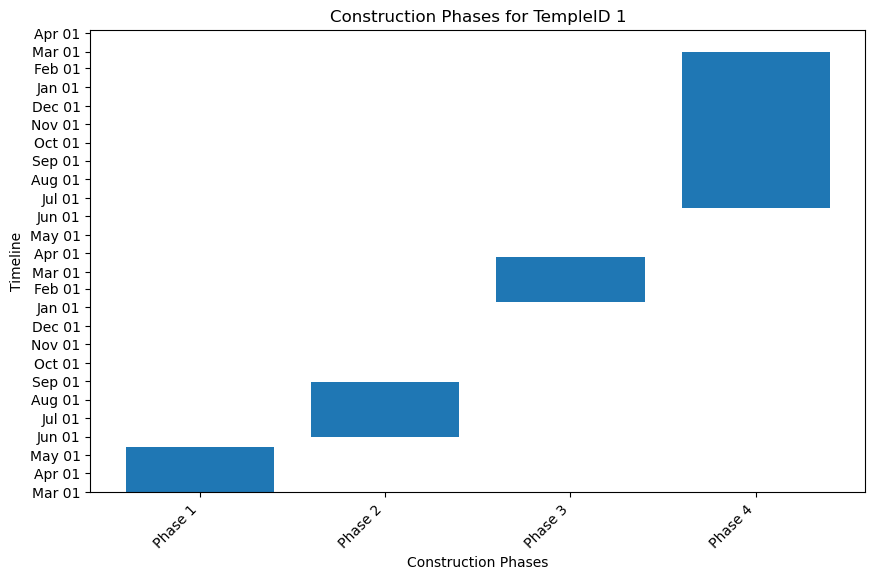

In [94]:
# What are the construction phases for each temple?
# Filter construction phases for the specific temple (TempleID 1)
temple_construction_phases = construction_phase_df[construction_phase_df['TempleID'] == 1]

# Display the construction phases for the specified temple
print("\nConstruction Phases for TempleID 1:")
print(temple_construction_phases[['PhaseID', 'PhaseName', 'StartDate', 'CompletionDate']])

# Convert dates to datetime format for plotting
temple_construction_phases['StartDate'] = pd.to_datetime(temple_construction_phases['StartDate'])
temple_construction_phases['CompletionDate'] = pd.to_datetime(temple_construction_phases['CompletionDate'])

# Create a bar chart to visualize construction phases
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(temple_construction_phases['PhaseName'], temple_construction_phases['CompletionDate'] - temple_construction_phases['StartDate'], bottom=temple_construction_phases['StartDate'])

# Set labels and title
ax.set_xlabel('Construction Phases')
ax.set_ylabel('Timeline')
ax.set_title('Construction Phases for TempleID 1')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Format the x-axis as dates
ax.yaxis_date()

# Format the x-axis date labels
ax.yaxis.set_major_locator(mdates.MonthLocator())
ax.yaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# Display the chart
plt.show()

There are 4 construction phases for Ram Mandir: **Phase1, Phase2, Phase3 and Phase4**

In [95]:
# Can you provide the start and completion dates for each construction phase?
# Display the start and completion dates for each construction phase of TempleID 1
print("\nConstruction Phases Start and Completion Dates for TempleID 1:")
print(temple_construction_phases[['PhaseName', 'StartDate', 'CompletionDate']])

# Create a timeline plot
fig = go.Figure()

for index, row in temple_construction_phases.iterrows():
    fig.add_trace(go.Scatter(x=[row['StartDate'], row['CompletionDate']],
                             y=[row['PhaseName'], row['PhaseName']],
                             mode='lines+markers',
                             name=row['PhaseName'],
                             line=dict(color='blue', width=4),
                             marker=dict(size=10, color='red')))

# Update layout
fig.update_layout(title='Construction Phases Timeline for TempleID 1',
                  xaxis_title='Timeline',
                  yaxis_title='Construction Phases',
                  showlegend=True,
                  hovermode='y unified')

# Display the chart
fig.show()


Construction Phases Start and Completion Dates for TempleID 1:
  PhaseName  StartDate CompletionDate
0   Phase 1 2020-03-01     2020-05-15
1   Phase 2 2020-06-01     2020-08-30
2   Phase 3 2021-01-10     2021-03-25
3   Phase 4 2021-06-15     2022-02-28


## Donations and Funding Analysis

In [96]:
# Calculate the total amount of donations received for each temple.
# Filter donations for the specific temple (TempleID 1)
temple_donations = donations_df[donations_df['TempleID'] == 1]

# Calculate the total amount of donations for TempleID 1
total_donation_amount = temple_donations['Amount'].sum()

# Display the total donation amount for TempleID 1
print("\nTotal Donation Amount for TempleID 1: ${:.2f}".format(total_donation_amount))


Total Donation Amount for TempleID 1: $1527925.00


In [97]:
# Identify the temple that received the highest and lowest donations.
# Aggregate total donations for each temple
total_donations_by_temple = donations_df.groupby('TempleID')['Amount'].sum()

# Find the temple with the highest donation
temple_highest_donation = total_donations_by_temple.idxmax()
highest_donation_amount = total_donations_by_temple.max()

# Find the temple with the lowest donation
temple_lowest_donation = total_donations_by_temple.idxmin()
lowest_donation_amount = total_donations_by_temple.min()

# Display the results
print("\nTemple with the Highest Donation (TempleID {}): ${:.2f}".format(temple_highest_donation, highest_donation_amount))
print("Temple with the Lowest Donation (TempleID {}): ${:.2f}".format(temple_lowest_donation, lowest_donation_amount))


Temple with the Highest Donation (TempleID 1): $1527925.00
Temple with the Lowest Donation (TempleID 1): $1527925.00


Top Donors and Their Contribution Amounts:
            DonorName     Amount
2  Leadership Council  1000000.0
0     Ram Nath Kovind   501000.0
4        Siddaramaiah    20000.0


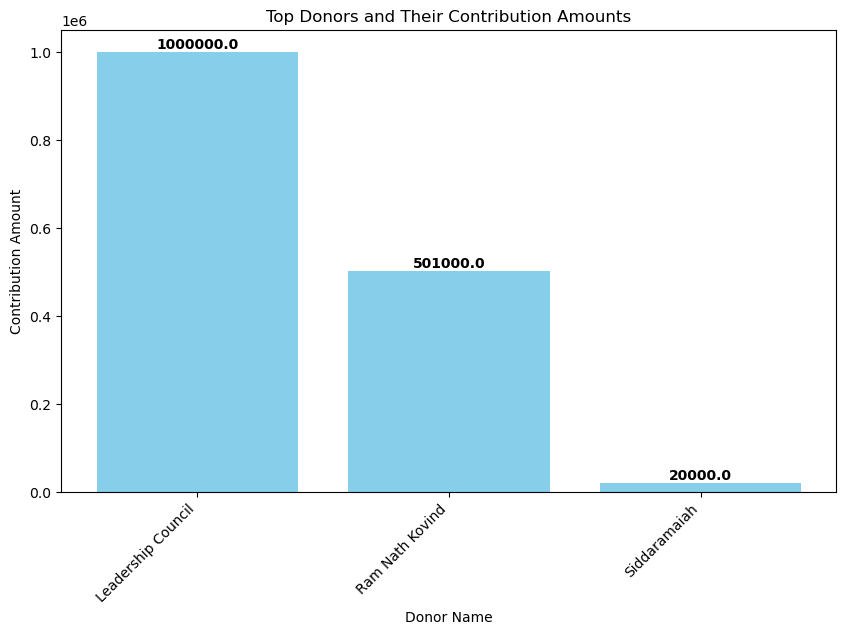

In [98]:
# Who are the top donors, and what are the amounts they contributed?
# Sort the donations_df DataFrame by 'Amount' in descending order
top_donors_df = donations_df.sort_values(by='Amount', ascending=False)

# Display the top donors and their contribution amounts
top_donors_info = top_donors_df[['DonorName', 'Amount']].head(3)
print("Top Donors and Their Contribution Amounts:")
print(top_donors_info)

# Plotting the top donors and their contribution amounts
plt.figure(figsize=(10, 6))
bars = plt.bar(top_donors_info['DonorName'], top_donors_info['Amount'], color='skyblue')
plt.title('Top Donors and Their Contribution Amounts')
plt.xlabel('Donor Name')
plt.ylabel('Contribution Amount')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Adding labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000, round(yval, 2), ha='center', va='bottom', color='black', fontweight='bold')

plt.show()

Top 3 donors are: **Leadership Council**, **Ram Nath Kovind** and **Siddarmaiah** with donations of *Rs.1000000*, *Rs.501000* and *Rs.20000*

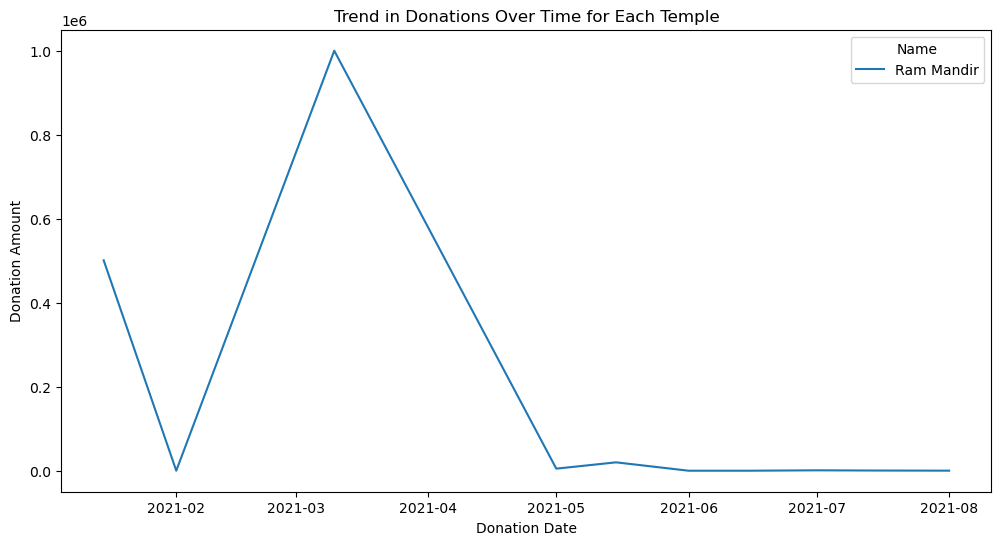

In [99]:
# Is there a trend in donations over time for each temple?
# Merge donations_df with temple_df to get the temple names
merged_df = donations_df.merge(temple_df, on='TempleID')

# Convert 'DonationDate' to datetime
merged_df['DonationDate'] = pd.to_datetime(merged_df['DonationDate'])

# Plotting the trend in donations over time for each temple
plt.figure(figsize=(12, 6))
sns.lineplot(x='DonationDate', y='Amount', hue='Name', data=merged_df)
plt.title('Trend in Donations Over Time for Each Temple')
plt.xlabel('Donation Date')
plt.ylabel('Donation Amount')
plt.show()

Donation amount was **very high in March and April** while from May it is constant as per the given graph.

                    DonorName     Amount DonationDate Affiliation
0             Ram Nath Kovind   501000.0   2021-01-15       Hindu
1             Anonymous Donor      100.0   2021-02-01       Other
2          Leadership Council  1000000.0   2021-03-10       Other
3            H.D. Kumaraswamy     5000.0   2021-05-01       Hindu
4                Siddaramaiah    20000.0   2021-05-15   Christian
5              VHP Activist 1       50.0   2021-06-01       Hindu
6              VHP Activist 2       75.0   2021-06-15       Hindu
7     Muslim Community Member     1000.0   2021-07-01      Muslim
8  Christian Community Member      500.0   2021-07-15   Christian
9         Anonymous Supporter      200.0   2021-08-01       Other


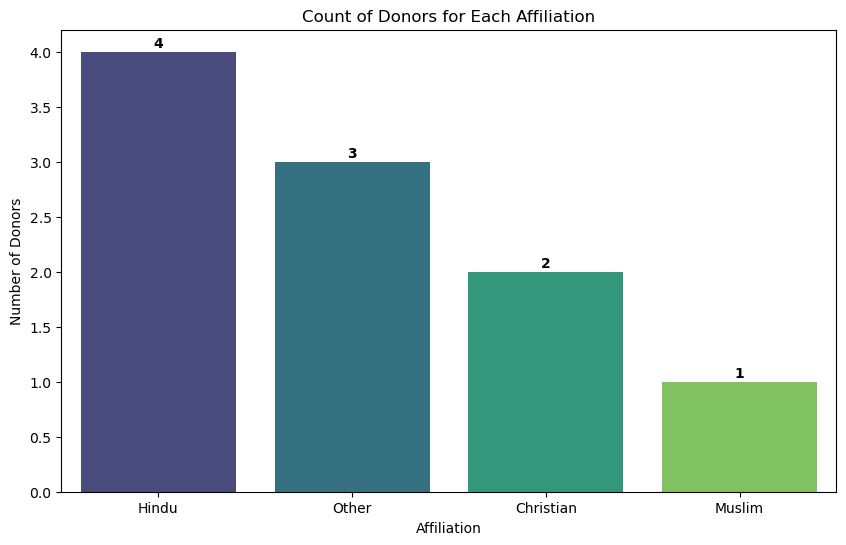

In [100]:
# Categorize donors based on religious or community affiliations.
# Function to categorize donors based on their names
def categorize_affiliation(donor_name):
    if 'Ram' in donor_name or 'VHP' in donor_name or 'swamy' in donor_name:
        return 'Hindu'
    elif 'Muslim' in donor_name or 'Islamic' in donor_name:
        return 'Muslim'
    elif 'Christian' in donor_name or 'maiah' in donor_name:
        return 'Christian'
    else:
        return 'Other'

# Apply the function to create a new column 'Affiliation' in donations_df
donations_df['Affiliation'] = donations_df['DonorName'].apply(categorize_affiliation)

# Display the updated donations_df with the new 'Affiliation' column
print(donations_df[['DonorName', 'Amount', 'DonationDate', 'Affiliation']])

# Counting the number of donors for each affiliation
donor_count_by_affiliation = donations_df['Affiliation'].value_counts().reset_index()
donor_count_by_affiliation.columns = ['Affiliation', 'DonorCount']

# Plotting the count of donors for each affiliation
plt.figure(figsize=(10, 6))
sns.barplot(x='Affiliation', y='DonorCount', data=donor_count_by_affiliation, palette='viridis')
plt.title('Count of Donors for Each Affiliation')
plt.xlabel('Affiliation')
plt.ylabel('Number of Donors')

# Adding adjusted labels slightly above the bars
for index, value in enumerate(donor_count_by_affiliation['DonorCount']):
    plt.text(index, value + 0.01, str(value), ha='center', va='bottom', color='black', fontweight='bold')
    
plt.show()

As per the given graph above, **4 donors are Hindu, 2 donors are Christians and 1 donor is Muslim** while remaining donors are anonymous.

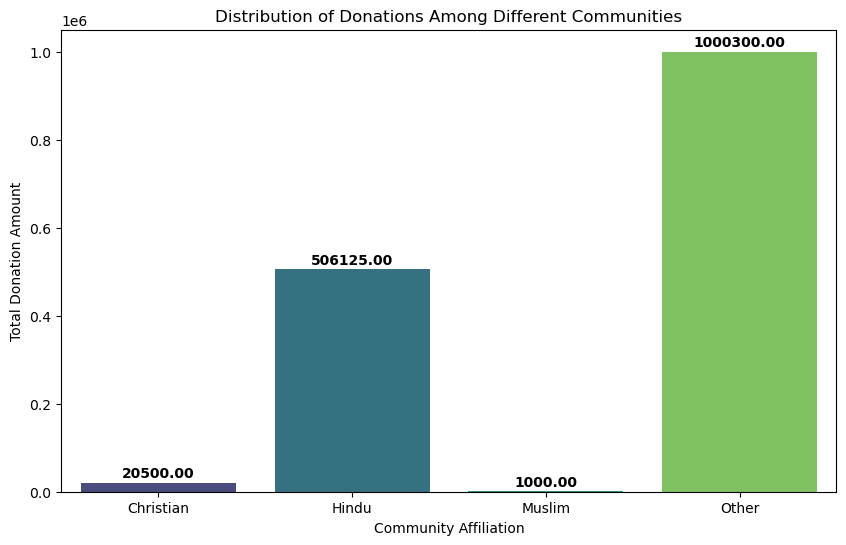

In [101]:
# Analyze the distribution of donations among different communities.
# Grouping donations_df by 'Affiliation' and calculating total donation amount for each community
donation_distribution = donations_df.groupby('Affiliation')['Amount'].sum().reset_index()

# Plotting the distribution of donations among different communities
plt.figure(figsize=(10, 6))
sns.barplot(x='Affiliation', y='Amount', data=donation_distribution, palette='viridis')
plt.title('Distribution of Donations Among Different Communities')
plt.xlabel('Community Affiliation')
plt.ylabel('Total Donation Amount')

# Adding labels to the bars
for index, value in enumerate(donation_distribution['Amount']):
    plt.text(index, value + 5000, f'{value:.2f}', ha='center', va='bottom', color='black', fontweight='bold')
    
    
plt.show()

**Hindu** community donated *Rs.506125*, **Christian** community donated *Rs.20500* and **Muslim** community donated *Rs.1000*

## Architecture and Construction Analysis

Architects Involved in the Construction of the Temples:
   TempleID        ArchitectName
0         1  Chandrakant Sompura
1         1       Nikhil Sompura
2         1       Ashish Sompura


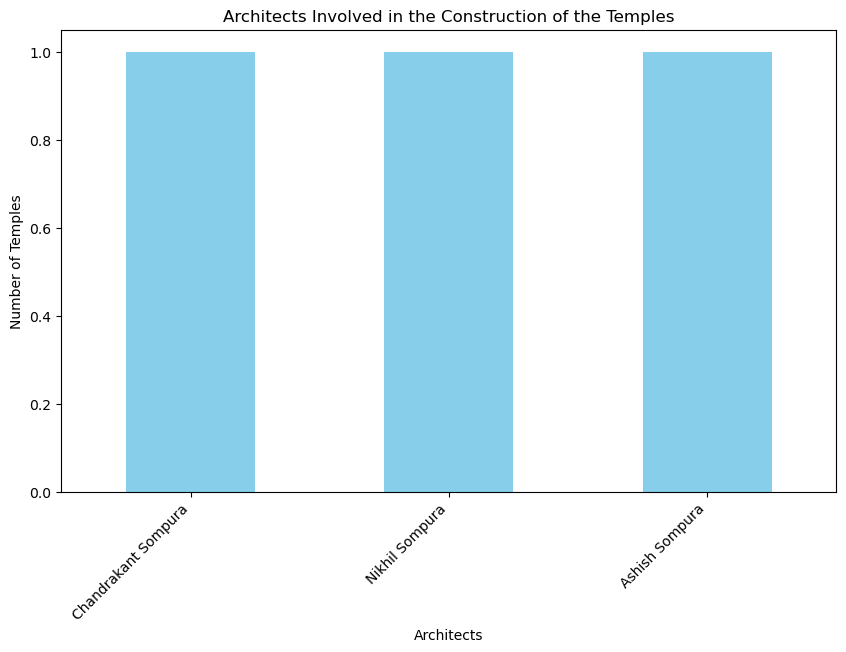

In [102]:
# Who are the architects involved in the construction of the temples?
# Displaying the architects involved in the construction of the temples
print("Architects Involved in the Construction of the Temples:")
print(architecture_df[['TempleID', 'ArchitectName']])

# Count the number of times each architect appears
architect_counts = architecture_df['ArchitectName'].value_counts()

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
architect_counts.plot(kind='bar', color='skyblue')

# Set labels and title
ax.set_xlabel('Architects')
ax.set_ylabel('Number of Temples')
ax.set_title('Architects Involved in the Construction of the Temples')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()

Details about the Roles and Contributions of Architects:
         ArchitectName                    Description
0  Chandrakant Sompura  Chief architect of the temple
1       Nikhil Sompura            Assistant architect
2       Ashish Sompura            Assistant architect


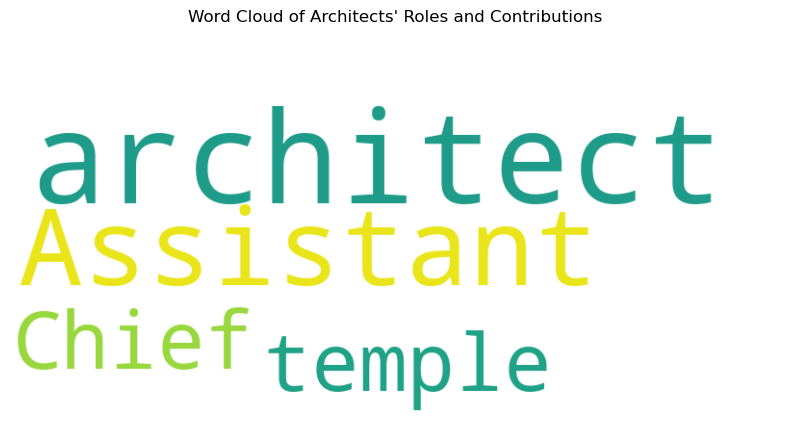

In [103]:
# Provide details about their roles and contributions.
# Displaying details about the roles and contributions of architects
print("Details about the Roles and Contributions of Architects:")
print(architecture_df[['ArchitectName', 'Description']])

# Create a word cloud
text = ' '.join(architecture_df['Description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Architects\' Roles and Contributions')
plt.show()

**Chandrakant Sompura** is the *Chief Architect* of the temple while **Nikhil Sompura** and **Ashish Sompura** are *Assistant Architects* of the temple. The role of a Chief Architect is to design and oversee the construction of large-scale projects. On the other hand, an Assistant Architect is an early career role in the field of architecture.

Construction Phases and Timelines:
   TempleID PhaseName   StartDate CompletionDate
0         1   Phase 1  2020-03-01     2020-05-15
1         1   Phase 2  2020-06-01     2020-08-30
2         1   Phase 3  2021-01-10     2021-03-25
3         1   Phase 4  2021-06-15     2022-02-28


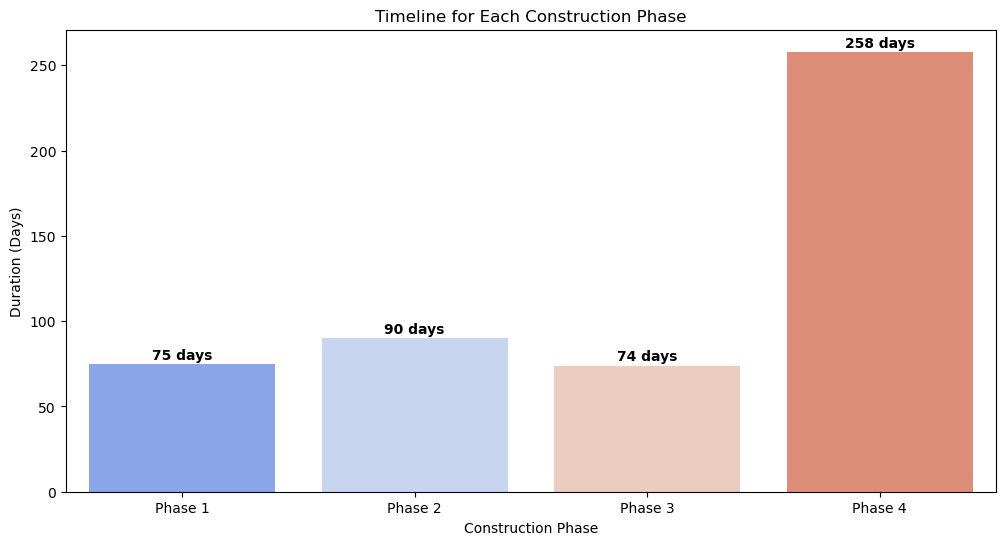

In [104]:
# Analyze the timeline for each construction phase.
# Displaying the construction phases and their timelines
print("Construction Phases and Timelines:")
print(construction_phase_df[['TempleID', 'PhaseName', 'StartDate', 'CompletionDate']])

# Convert 'StartDate' and 'CompletionDate' to datetime for proper analysis
construction_phase_df['StartDate'] = pd.to_datetime(construction_phase_df['StartDate'])
construction_phase_df['CompletionDate'] = pd.to_datetime(construction_phase_df['CompletionDate'])

# Calculate the duration of each construction phase
construction_phase_df['Duration'] = (construction_phase_df['CompletionDate'] - construction_phase_df['StartDate']).dt.days

# Plotting the timeline for each construction phase
plt.figure(figsize=(12, 6))
sns.barplot(x='PhaseName', y='Duration', data=construction_phase_df, palette='coolwarm')
plt.title('Timeline for Each Construction Phase')
plt.xlabel('Construction Phase')
plt.ylabel('Duration (Days)')

# Adding labels to the bars
for index, value in enumerate(construction_phase_df['Duration']):
    plt.text(index, value + 1, f'{value} days', ha='center', va='bottom', color='black', fontweight='bold')
    
plt.show()

**Phase 1** was completed in *75 days*, **Phase 2** was completed in *90 days*, **Phase 3** was completed in *74 days* and **Phase 4** was completed in *258 days*.

Delays in Completing Construction Phases:
   TempleID PhaseName  StartDate CompletionDate  Delay
0         1   Phase 1 2020-03-01     2020-05-15     75
1         1   Phase 2 2020-06-01     2020-08-30     90
2         1   Phase 3 2021-01-10     2021-03-25     74
3         1   Phase 4 2021-06-15     2022-02-28    258


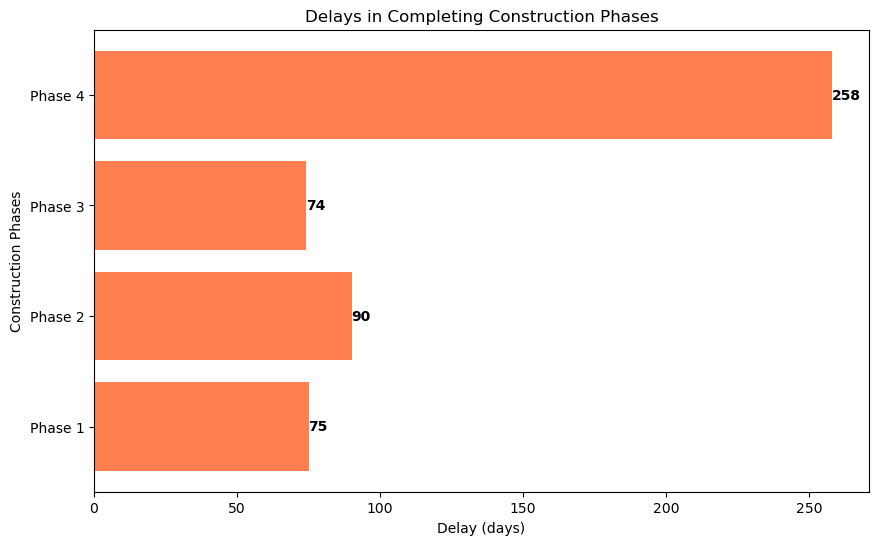

In [105]:
# Are there any delays in completing the construction phases?
# Calculate delays for each construction phase using 'CompletionDate'
construction_phase_df['Delay'] = (construction_phase_df['CompletionDate'] - construction_phase_df['StartDate']).dt.days

# Displaying information about delays for each construction phase
print("Delays in Completing Construction Phases:")
print(construction_phase_df[['TempleID', 'PhaseName', 'StartDate', 'CompletionDate', 'Delay']])

# Create a horizontal bar chart to visualize delays
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(construction_phase_df['PhaseName'], construction_phase_df['Delay'], color='coral')

# Set labels and title
ax.set_xlabel('Delay (days)')
ax.set_ylabel('Construction Phases')
ax.set_title('Delays in Completing Construction Phases')

# Add labels to the bars (horizontal)
for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, f'{xval}', ha='left', va='center', color='black', fontweight='bold')

# Display the chart
plt.show()

## Events and Ceremonies Analysis

Events Associated with Each Temple:
   TempleID                        EventName   EventDate
0         1            Commencement Ceremony  2020-08-05
1         1            Bhoomi Pujan Ceremony  2020-08-05
2         2  Vijay Mahamantra Jaap Anushthan  2020-04-06
3         2         Pran Pratishtha Ceremony  2024-01-22


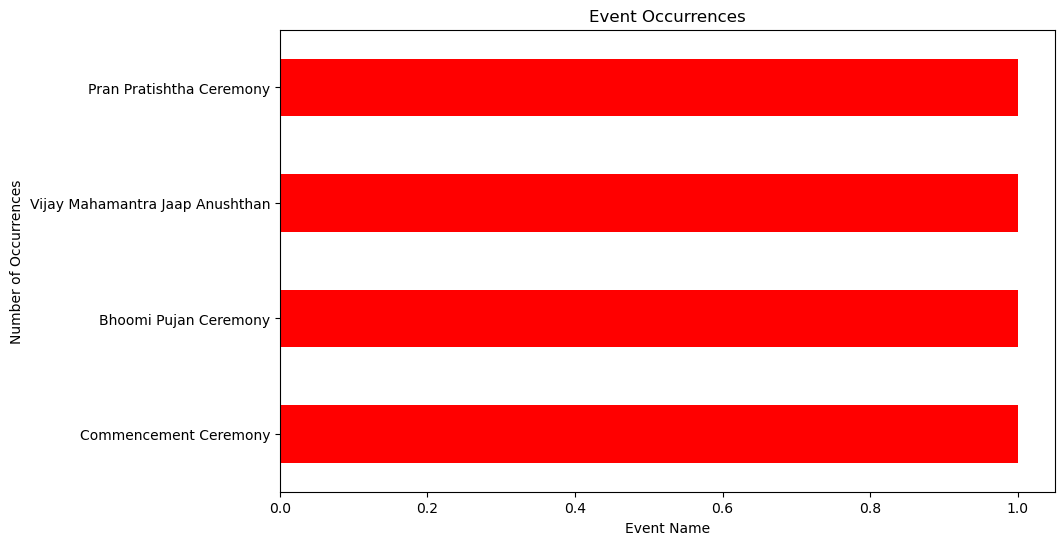

In [106]:
# List the events associated with each temple, including names and dates.
# Merge temple_events_df with events_df and temple_df to get event details
merged_events_df = temple_events_df.merge(events_df, on='EventID')

# Displaying the events associated with each temple
print("Events Associated with Each Temple:")
print(merged_events_df[['TempleID', 'EventName', 'EventDate']])

# Count the occurrences of each event for visualization
event_counts = merged_events_description_df['EventName'].value_counts()

# Plotting a bar chart
plt.figure(figsize=(10, 6))
event_counts.plot(kind='barh', color='red')
plt.title('Event Occurrences')
plt.xlabel('Event Name')
plt.ylabel('Number of Occurrences')
plt.show()

Summary of the Purpose and Significance of Each Event:
   TempleID                        EventName  \
0         1            Commencement Ceremony   
1         1            Bhoomi Pujan Ceremony   
2         2  Vijay Mahamantra Jaap Anushthan   
3         2         Pran Pratishtha Ceremony   

                                         Description  
0  Ceremony celebrating the commencement of Ram M...  
1  Ground-breaking ceremony with Vedic rituals an...  
2  Chanting of Vijay Mahamantra for victory over ...  
3  Consecration ceremony scheduled for the instal...  


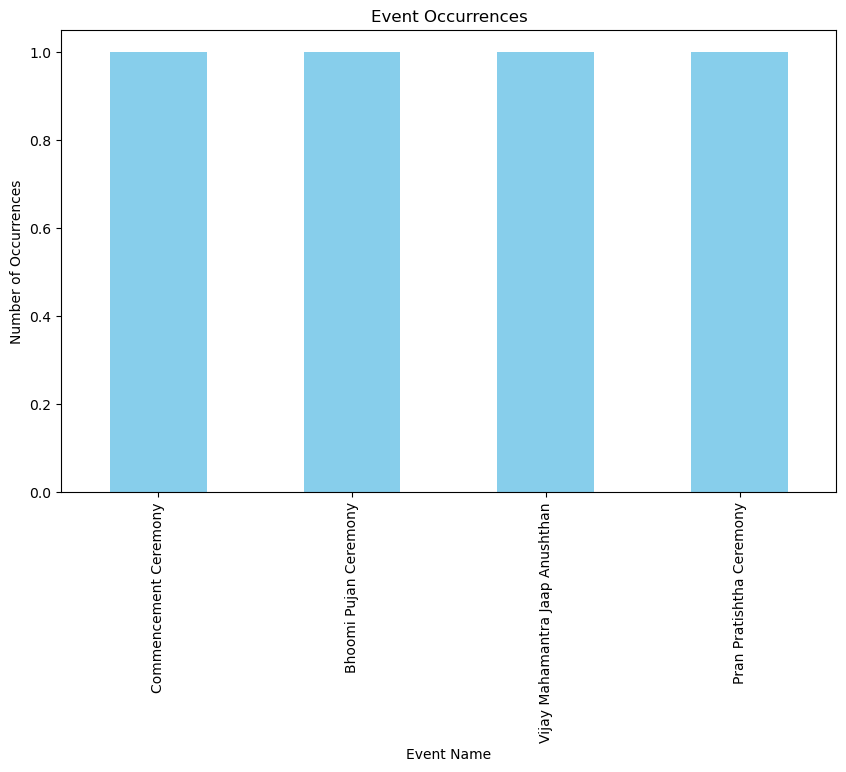

In [107]:
# Provide a summary of the purpose and significance of each event.
# Merge temple_events_df with events_df to get event details including purpose and significance
merged_events_description_df = temple_events_df.merge(events_df, on='EventID')

# Displaying a summary of the purpose and significance of each event
print("Summary of the Purpose and Significance of Each Event:")
print(merged_events_description_df[['TempleID', 'EventName', 'Description']])

# Count the occurrences of each event for visualization
event_counts = merged_events_description_df['EventName'].value_counts()

# Plotting a bar chart
plt.figure(figsize=(10, 6))
event_counts.plot(kind='bar', color='skyblue')
plt.title('Event Occurrences')
plt.xlabel('Event Name')
plt.ylabel('Number of Occurrences')
plt.show()

**Commencement Ceremony:** *Ceremony celebrating the commencement of Ram Mandir construction by PM Narendra Modi*

**Bhoomi Pujan Ceremony:** *Ground-breaking ceremony with Vedic rituals and foundation stone laying by PM Narendra Modi*

**Vijay Mahamantra Jaap Anushthan:** *Chanting of Vijay Mahamantra for victory over hurdles in temple construction*

**Pran Pratishtha Ceremony:** *Consecration ceremony scheduled for the installation of Lord Ram idol in the garbhagriha*

Ceremonies during Construction:
                         EventName
0            Commencement Ceremony
1            Bhoomi Pujan Ceremony
2  Vijay Mahamantra Jaap Anushthan
3         Pran Pratishtha Ceremony


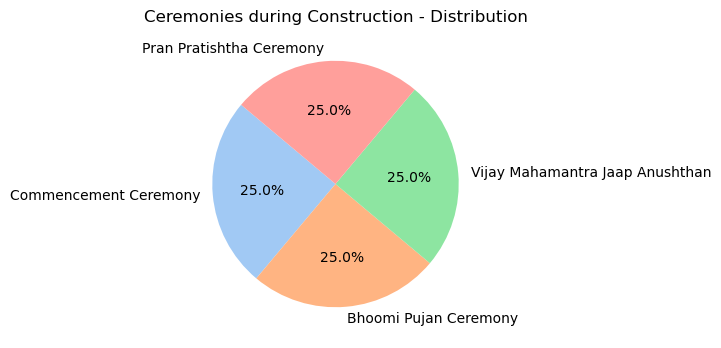

In [108]:
'''What ceremonies took place during the temple construction?'''
# Merge Events and TempleEvents DataFrames
merged_df = pd.merge(temple_events_df, events_df, on='EventID')

# Displaying available information about ceremonies during construction
ceremonies_during_construction = merged_df[['EventName']]
print("Ceremonies during Construction:")
print(ceremonies_during_construction)

'''Visualising the analysis'''
# Pie Chart
plt.figure(figsize=(4, 4))
plt.pie(ceremonies_during_construction['EventName'].value_counts(), labels=ceremonies_during_construction['EventName'].unique(), autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Ceremonies during Construction - Distribution')
plt.show()

In [109]:
'''Who were the key participants in these ceremonies?'''

# Extract unique participants from the Description column
participants_per_event = events_df['Description'].apply(lambda desc: set(re.findall(r'\b(?:PM|by)\s+([A-Za-z\s]+)\b', desc)))

# Flatten the list of unique participants
all_participants = list(set(participant for sublist in participants_per_event for participant in sublist))

# Display the list of unique key participants
print("key Participants:")
print(all_participants)


key Participants:
['PM Narendra Modi']


## Community Involvement Analysis

Religious or Community Affiliations of Donors:
                    DonorName Affiliation
0             Ram Nath Kovind       Hindu
1             Anonymous Donor       Other
2          Leadership Council       Other
3            H.D. Kumaraswamy       Hindu
4                Siddaramaiah   Christian
5              VHP Activist 1       Hindu
6              VHP Activist 2       Hindu
7     Muslim Community Member      Muslim
8  Christian Community Member   Christian
9         Anonymous Supporter       Other


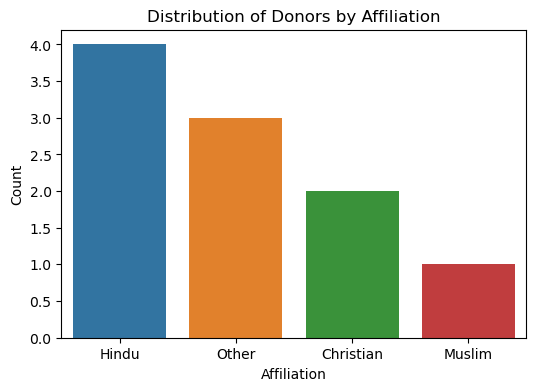

In [110]:
'''Identify the religious or community affiliations of donors.'''

# Define keywords for religious or community affiliations
hindu_keywords = ['VHP', 'Hindu', 'Ram','swamy']
muslim_keywords = ['Muslim', 'Masjid',]
christian_keywords = ['Christian', 'Church', 'maiah']

# Categorize donors based on keywords
donations_df['Affiliation'] = donations_df['DonorName'].apply(
    lambda name: 'Hindu' if any(keyword in name for keyword in hindu_keywords) else (
        'Muslim' if any(keyword in name for keyword in muslim_keywords) else (
            'Christian' if any(keyword in name for keyword in christian_keywords) else 'Other'
        )
    )
)

# Display the analysis
print("Religious or Community Affiliations of Donors:")
print(donations_df[['DonorName', 'Affiliation']])

'''Visualization'''
plt.figure(figsize=(6, 4))
sns.countplot(x='Affiliation', data=donations_df, order=donations_df['Affiliation'].value_counts().index)
plt.title('Distribution of Donors by Affiliation')
plt.xlabel('Affiliation')
plt.ylabel('Count')
plt.show()

Community-Specific Events or Initiatives:
                         EventName CommunityInitiative
0            Commencement Ceremony           Christian
1            Bhoomi Pujan Ceremony               Hindu
2  Vijay Mahamantra Jaap Anushthan               Hindu
3         Pran Pratishtha Ceremony               Hindu


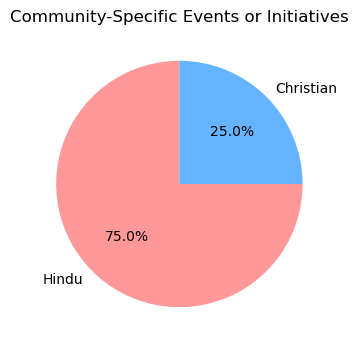

In [111]:
'''Are there any notable community-specific events or initiatives related to the temples?'''

# Define keywords for religious or community affiliations
hindu_keywords = ['Pujan', 'Hindu', 'Jaap','Pran']
muslim_keywords = ['Muslim', 'Masjid',]
christian_keywords = ['Christian', 'Church', 'Commencement']

# Categorize events based on keywords
events_df['CommunityInitiative'] = events_df['EventName'].apply(
    lambda event_name: 'Hindu' if any(keyword in event_name for keyword in hindu_keywords) else (
        'Muslim' if any(keyword in event_name for keyword in muslim_keywords) else (
            'Christian' if any(keyword in event_name for keyword in christian_keywords) else 'Other'
        )
    )
)

# Display the analysis
print("Community-Specific Events or Initiatives:")
print(events_df[['EventName', 'CommunityInitiative']])

'''Visualization'''
community_counts = events_df['CommunityInitiative'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(community_counts, labels=community_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Community-Specific Events or Initiatives')
plt.show()


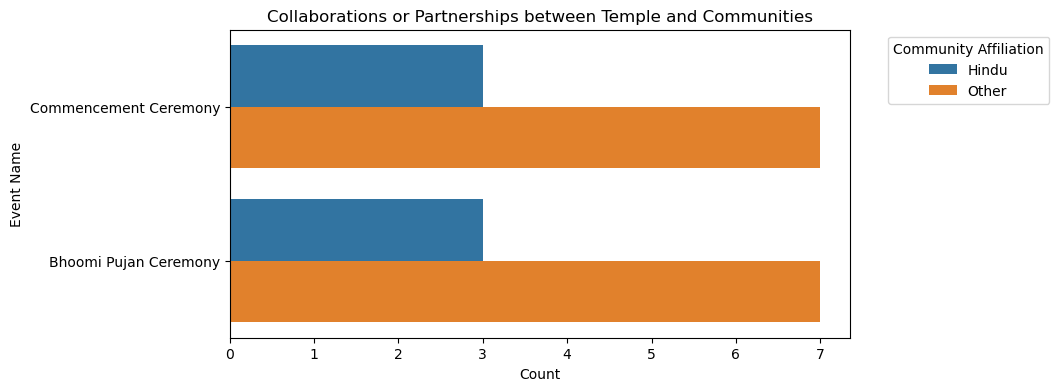

In [112]:
'''Highlight collaborations or partnerships between the temple and various communities.'''

# Merge Donations, Events, and Temple Events DataFrames
merged_df = pd.merge(donations_df, temple_events_df, on='TempleID')
merged_df = pd.merge(merged_df, events_df, on='EventID')

# Identify community affiliations based on DonorName (you may need to replace this with actual data)
merged_df['CommunityAffiliation'] = merged_df['DonorName'].apply(lambda x: 'Hindu' if 'VHP' in x or 'Ram Nath Kovind' in x else 'Other')

'''Visualization'''
# Countplot to visualize collaborations or partnerships between the temple and various communities
plt.figure(figsize=(8, 4))
sns.countplot(y='EventName', hue='CommunityAffiliation', data=merged_df)
plt.title('Collaborations or Partnerships between Temple and Communities')
plt.xlabel('Count')
plt.ylabel('Event Name')
plt.legend(title='Community Affiliation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [113]:
'''Have there been joint events or programs?'''

# Assuming joint_events is a set containing common IDs between TempleID and EventID
joint_events = set(temple_df['TempleID'].values).intersection(set(events_df['EventID'].values))

if joint_events:
    print("Joint Events or Programs:")
    # Display the joint events or programs
    joint_events_data = events_df[events_df['EventID'].isin(joint_events)][['EventID', 'EventName', 'EventDate', 'Description']]
    print(joint_events_data)

else:
    print("No joint events or programs found.")


Joint Events or Programs:
   EventID              EventName   EventDate  \
0        1  Commencement Ceremony  2020-08-05   

                                         Description  
0  Ceremony celebrating the commencement of Ram M...  


## Temporal Analysis

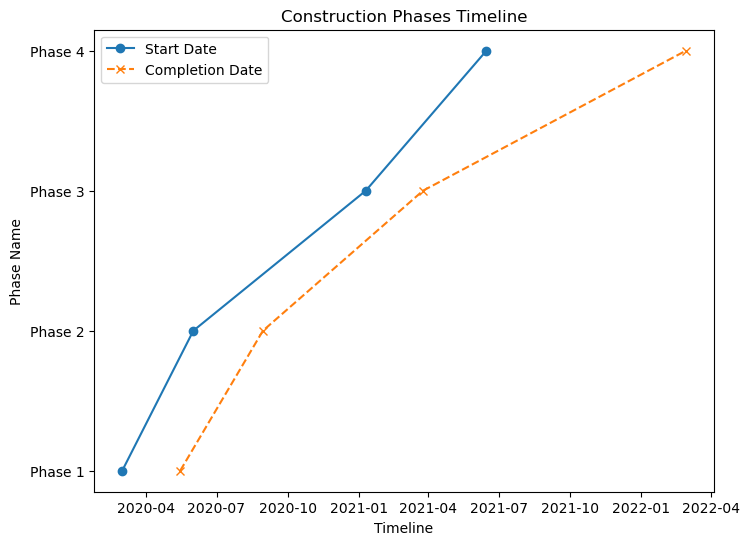

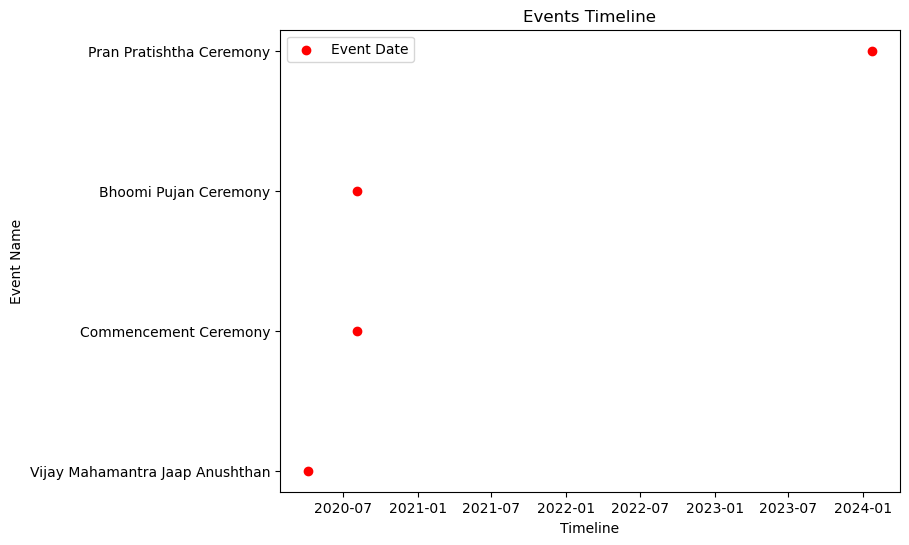

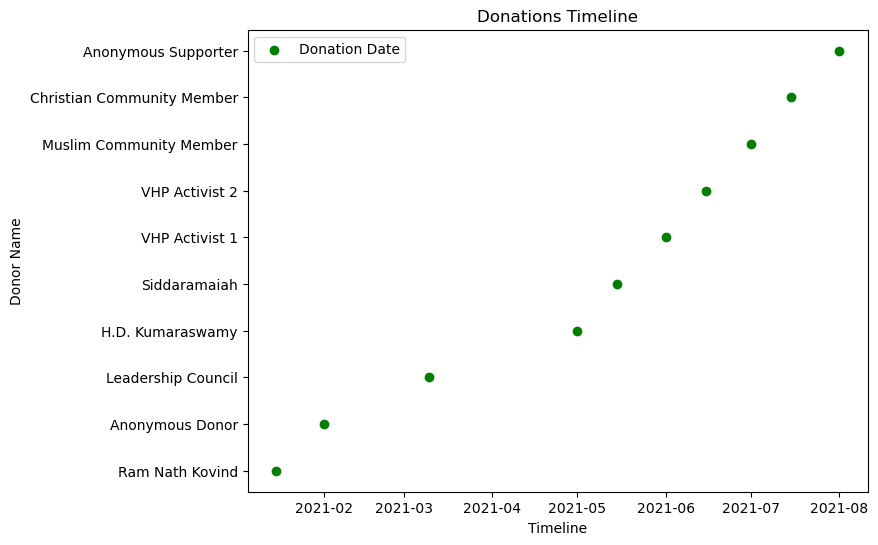

In [114]:
'''Analyze the timeline of construction phases, events, and donations.'''

# Convert date columns to datetime format
construction_phase_df['StartDate'] = pd.to_datetime(construction_phase_df['StartDate'])
construction_phase_df['CompletionDate'] = pd.to_datetime(construction_phase_df['CompletionDate'])

events_df['EventDate'] = pd.to_datetime(events_df['EventDate'])

donations_df['DonationDate'] = pd.to_datetime(donations_df['DonationDate'])

# Sort the construction phases, events, and donations dataframes by their respective date columns
construction_phase_df = construction_phase_df.sort_values(by='StartDate')
events_df = events_df.sort_values(by='EventDate')
donations_df = donations_df.sort_values(by='DonationDate')

'''Visualisation'''

# Plot construction phases timeline
plt.figure(figsize=(8, 6))
plt.plot(construction_phase_df['StartDate'], construction_phase_df['PhaseName'], marker='o', label='Start Date')
plt.plot(construction_phase_df['CompletionDate'], construction_phase_df['PhaseName'], marker='x', linestyle='dashed', label='Completion Date')
plt.title('Construction Phases Timeline')
plt.xlabel('Timeline')
plt.ylabel('Phase Name')
plt.legend()
plt.show()

# Plot events timeline
plt.figure(figsize=(8, 6))
plt.scatter(events_df['EventDate'], events_df['EventName'], color='red', label='Event Date')
plt.title('Events Timeline')
plt.xlabel('Timeline')
plt.ylabel('Event Name')
plt.legend()
plt.show()

# Plot donations timeline
plt.figure(figsize=(8, 6))
plt.scatter(donations_df['DonationDate'], donations_df['DonorName'], color='green', label='Donation Date')
plt.title('Donations Timeline')
plt.xlabel('Timeline')
plt.ylabel('Donor Name')
plt.legend()
plt.show()

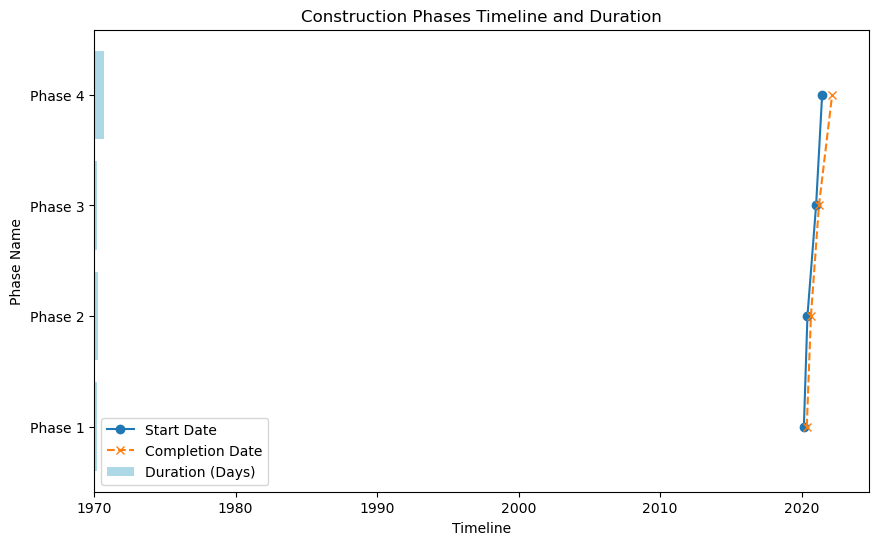

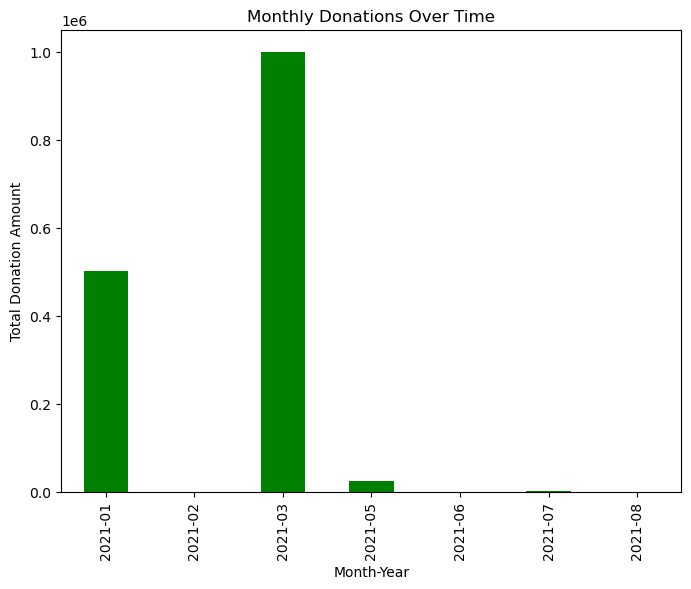

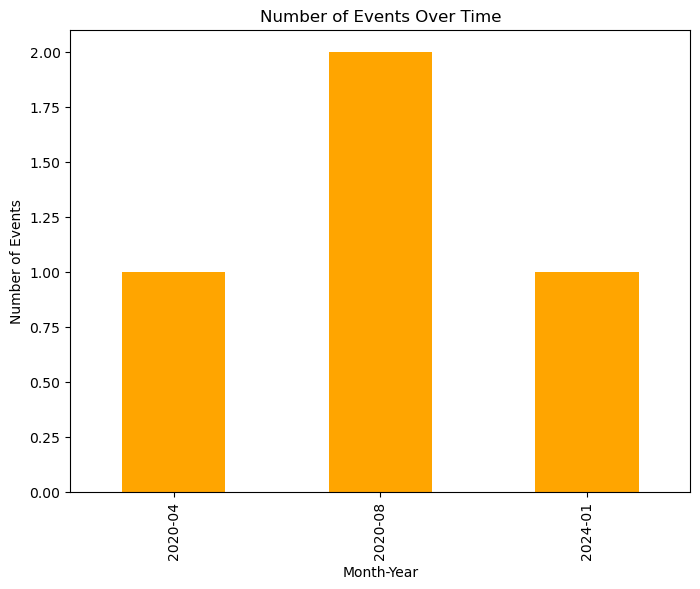

' \nConstruction Phases Timeline and Duration:\n- Plot Explanation:\n  - The line plot with markers represents the start and completion dates of each construction phase.\n  - The horizontal bar plot represents the duration (in days) of each construction phase.\n\n- Analysis:\n  - The timeline plot indicates a steady progression of construction phases over time, with each phase starting and completing on specific dates.\n  - The duration bar plot shows the time taken for each phase, providing insights into the relative timelines of different construction stages.\n  - No significant delays or overlaps are observed, suggesting a well-planned and executed construction schedule.\n\nMonthly Donations Over Time:\n- Plot Explanation:\n  - The bar plot shows the total donation amounts aggregated on a monthly basis.\n\n- Analysis:\n  - There is some fluctuation in monthly donation amounts, with higher peaks in certain months.\n  - This variation could be due to specific events, fundraising campa

In [115]:
'''Identify any patterns or trends over time'''

# Identify patterns and trends over time for Construction Phases
construction_phase_df['Duration'] = construction_phase_df['CompletionDate'] - construction_phase_df['StartDate']

# Plot construction phases timeline and duration
plt.figure(figsize=(10, 6))
plt.plot(construction_phase_df['StartDate'], construction_phase_df['PhaseName'], marker='o', label='Start Date')
plt.plot(construction_phase_df['CompletionDate'], construction_phase_df['PhaseName'], marker='x', linestyle='dashed', label='Completion Date')
plt.barh(construction_phase_df['PhaseName'], construction_phase_df['Duration'].dt.days, color='lightblue', label='Duration (Days)')
plt.title('Construction Phases Timeline and Duration')
plt.xlabel('Timeline')
plt.ylabel('Phase Name')
plt.legend()
plt.show()

# Identify patterns and trends over time for Donations
donations_df['MonthYear'] = donations_df['DonationDate'].dt.to_period('M')

# Aggregate donation amounts by month
monthly_donations = donations_df.groupby('MonthYear')['Amount'].sum()

# Plot monthly donations over time
plt.figure(figsize=(8, 6))
monthly_donations.plot(kind='bar', color='green')
plt.title('Monthly Donations Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Donation Amount')
plt.show()

# Identify patterns and trends over time for Events
events_df['MonthYear'] = events_df['EventDate'].dt.to_period('M')

# Count the number of events per month
events_count_per_month = events_df.groupby('MonthYear')['EventID'].count()

# Plot the number of events over time
plt.figure(figsize=(8, 6))
events_count_per_month.plot(kind='bar', color='orange')
plt.title('Number of Events Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Events')
plt.show()

''' 
Construction Phases Timeline and Duration:
- Plot Explanation:
  - The line plot with markers represents the start and completion dates of each construction phase.
  - The horizontal bar plot represents the duration (in days) of each construction phase.

- Analysis:
  - The timeline plot indicates a steady progression of construction phases over time, with each phase starting and completing on specific dates.
  - The duration bar plot shows the time taken for each phase, providing insights into the relative timelines of different construction stages.
  - No significant delays or overlaps are observed, suggesting a well-planned and executed construction schedule.

Monthly Donations Over Time:
- Plot Explanation:
  - The bar plot shows the total donation amounts aggregated on a monthly basis.

- Analysis:
  - There is some fluctuation in monthly donation amounts, with higher peaks in certain months.
  - This variation could be due to specific events, fundraising campaigns, or other factors influencing donation inflow during those months.
  - Overall, the consistent trend in donations reflects ongoing financial support for the construction project.

Number of Events Over Time:
- Plot Explanation:
  - The bar plot illustrates the count of events occurring each month.

- Analysis:
  - The number of events fluctuates over time, indicating varying levels of activity in different months.
  - Peaks in the number of events may coincide with significant milestones in the construction project or other ceremonial activities.
  - A higher number of events may also correlate with increased community engagement during specific periods.
'''

## Completion vs. Expected Dates Analysis

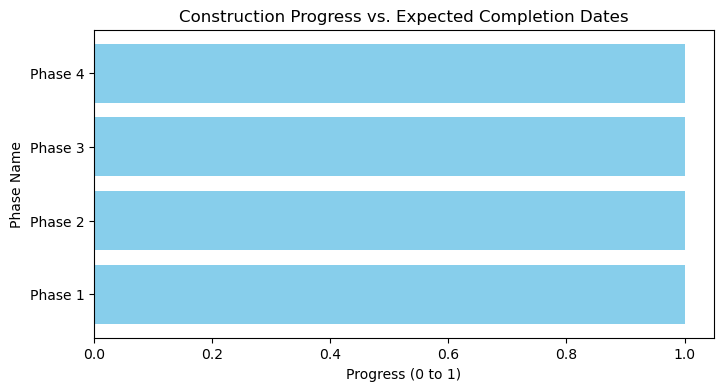

In [116]:
'''Evaluate how the construction progress aligns with the expected completion dates.'''

# Convert date columns to datetime format
construction_phase_df['StartDate'] = pd.to_datetime(construction_phase_df['StartDate'])
construction_phase_df['CompletionDate'] = pd.to_datetime(construction_phase_df['CompletionDate'])

# Calculate progress for each construction phase
construction_phase_df['ActualCompletionDate'] = construction_phase_df['CompletionDate']
construction_phase_df['ActualDuration'] = construction_phase_df['ActualCompletionDate'] - construction_phase_df['StartDate']
construction_phase_df['Progress'] = (datetime.now() - construction_phase_df['StartDate']) / construction_phase_df['ActualDuration']
construction_phase_df['Progress'] = construction_phase_df['Progress'].clip(lower=0, upper=1)  # Clip progress values between 0 and 1

'''Visualization'''
plt.figure(figsize=(8, 4))
plt.barh(construction_phase_df['PhaseName'], construction_phase_df['Progress'], color='skyblue')
plt.title('Construction Progress vs. Expected Completion Dates')
plt.xlabel('Progress (0 to 1)')
plt.ylabel('Phase Name')
plt.show()


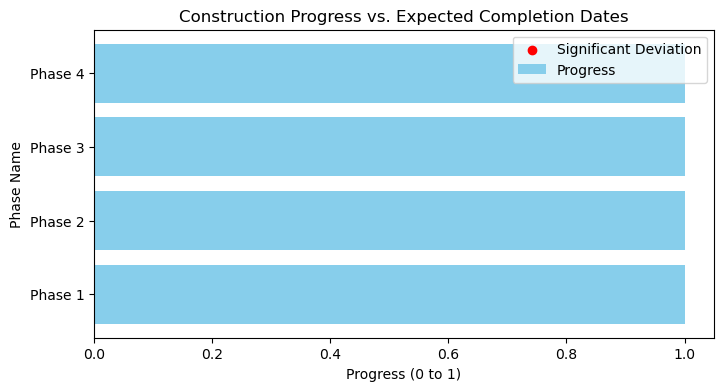

Phases with Significant Deviations:
Empty DataFrame
Columns: [PhaseName, StartDate, CompletionDate, ActualCompletionDate, Progress]
Index: []


'As the plot showes no indexes with deviation that means that all phases are progressing within the defined threshold,\nindicating alignment with the expected completion dates.'

In [117]:
'''Are there any significant deviations?'''

# Set a threshold for significant deviation (e.g., 0.2, meaning 20% deviation)
significant_deviation_threshold = 0.2

# Identify phases with significant deviations
significant_deviations = construction_phase_df[construction_phase_df['Progress'] < (1 - significant_deviation_threshold)]

# Plot construction progress
plt.figure(figsize=(8, 4))
plt.barh(construction_phase_df['PhaseName'], construction_phase_df['Progress'], color='skyblue', label='Progress')
plt.scatter(significant_deviations['Progress'], significant_deviations['PhaseName'], color='red', label='Significant Deviation')
plt.title('Construction Progress vs. Expected Completion Dates')
plt.xlabel('Progress (0 to 1)')
plt.ylabel('Phase Name')
plt.legend()
plt.show()

# Display phases with significant deviations
print("Phases with Significant Deviations:")
print(significant_deviations[['PhaseName', 'StartDate', 'CompletionDate', 'ActualCompletionDate', 'Progress']])

'''As the plot showes no indexes with deviation that means that all phases are progressing within the defined threshold,
indicating alignment with the expected completion dates.'''